In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
# from pandas.tools.plotting import table

In [4]:
data_resume = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\CBSS Reports\cbss_data.csv', header=1,  encoding = "ISO-8859-1")
data_appt = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\CBSS Reports\cbss_appt.csv', header=1,  encoding = "ISO-8859-1")

# for col in data_appt.columns: 
#     print(col)   

In [5]:
data_appt = data_appt.loc[data_appt['School Of'] == 'Behavioral and Social Sciences']

appt_type = data_appt.groupby('Appt Type').size()
services_ = data_appt.groupby('Service Requested').size()

appt_type
# services_

Appt Type
campus interview                      25
major & career exploration center     97
scheduled                            415
walk-in                              224
dtype: int64

In [6]:
file_merge = data_resume.merge(data_appt,  how='outer', on='Student Id')
file_merge.drop(columns = ['Type of User_y', 'Appt Status','Appt Date', 'Scheduled Time', 'Start Time',
                          'End Time', 'Arrival Wait Time', 'Timely Start', 'Appt Duration', 'Major_y', 'School Of_y',
                          'Class Level_y', 'Grad Date_y', 'Admin First Name_y', 'Admin Last Name_y', 
                          'Check-In Time', 'Last Login Date', 'Admin Last Name_x', 'Admin First Name_x',
                          'Admin Last Name_x','Name'], inplace=True)

file_merge.rename(index=str, columns={'Grad Date_x': 'Grad Date', 'Major_x': 'Major', 'School Of_x':'School Of',
                                     'Class Level_x': 'Class Level', 'Type of User_x':'Type of User'}, inplace=True)

# file_merge["student_name"] = file_merge[["First Name", "Last Name"]].apply(lambda x: ' '.join(x), axis=1)

In [7]:
#Clean Data

cbss_ = file_merge.loc[file_merge['School Of'] == 'Behavioral and Social Sciences']
cbss_.replace('International Trade', 'International Studies', inplace=True)
cbss_.replace('Graduate Masters', 'Masters', inplace=True)


#Join Admin Names/two columns
cbss_["Student Name"] = cbss_[["First Name", "Last Name"]].apply(lambda x: ' '.join(x), axis=1)

cbss_ = cbss_[cbss_['Appt Type'].notnull()]
majors = cbss_['Major'].unique()

cbss_.shape
cbss_

C:\Users\sushmita-khan\AppData\Local\Continuum\anaconda3\envs\career deve reports\lib\site-packages\pandas\core\frame.py:4258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\sushmita-khan\AppData\Local\Continuum\anaconda3\envs\career deve reports\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,First Name,Last Name,Email,Student Id,Type of User,Score,Resume Title,Resume Create Date,Resume Modify Date,Review Date,...,Account Create Date,Grad Date,GPA,Major,School Of,Class Level,Student Email,Appt Type,Service Requested,Student Name
41,Katherine,Allegood,katie_l_allegood@georgiasouthern.edu,900889264,"student,",24.0,Current Resume as of Oct. 31st 2018,2018-10-31 22:54:51,2018-11-01 12:28:13,2018-11-01 12:26:06,...,2015-08-26 20:39:54,2019-07-26,2.19,Child/Fam Development,Behavioral and Social Sciences,Senior,katie_l_allegood@georgiasouthern.edu,scheduled,Mock Interview,Katherine Allegood
53,Eric,Alverson,eric_a_alverson@georgiasouthern.edu,900804958,"alumni,",12.0,My current up to date resume for Senior Seminar,2018-12-04 17:12:11,2018-12-04 17:12:12,2018-12-05 12:34:18,...,2015-05-31 16:57:42,2018-12-30,2.11,Criminal Justice & Criminology,Behavioral and Social Sciences,Senior,eric_a_alverson@georgiasouthern.edu,scheduled,Mock Interview,Eric Alverson
72,Dushuana,Anderson-Cooksey,dushuana_a_anderson-cookse@georgiasouthern.edu,900896719,"student,",27.0,Anderson_D2019.pdf,2019-03-01 11:24:58,2019-03-01 11:24:58,2019-03-01 13:06:41,...,2015-08-26 20:39:55,2019-05-11,2.93,Criminal Justice & Criminology,Behavioral and Social Sciences,Senior,dushuana_a_anderson-cookse@georgiasouthern.edu,walk-in,Resume/Cover Letter Review,Dushuana Anderson-Cooksey
73,Dushuana,Anderson-Cooksey,dushuana_a_anderson-cookse@georgiasouthern.edu,900896719,"student,",27.0,Anderson_D2019.pdf,2019-03-01 11:24:58,2019-03-01 11:24:58,2019-03-01 13:06:41,...,2015-08-26 20:39:55,2019-05-11,2.93,Criminal Justice & Criminology,Behavioral and Social Sciences,Senior,dushuana_a_anderson-cookse@georgiasouthern.edu,walk-in,Resume/Cover Letter Review,Dushuana Anderson-Cooksey
85,Grace,Arienzo,grace_e_arienzo@georgiasouthern.edu,900903496,"student,",19.0,Grace Arienzo's resume,2019-03-05 11:04:07,2019-03-05 12:42:14,2019-03-05 12:41:42,...,2016-08-19 13:56:13,2021-12-30,3.19,Psychology,Behavioral and Social Sciences,Senior,grace_e_arienzo@georgiasouthern.edu,scheduled,EQI Feedback Session,Grace Arienzo
86,Grace,Arienzo,grace_e_arienzo@georgiasouthern.edu,900903496,"student,",19.0,Grace Arienzo's resume,2019-03-05 11:04:07,2019-03-05 12:42:14,2019-03-05 12:41:42,...,2016-08-19 13:56:13,2021-12-30,3.19,Psychology,Behavioral and Social Sciences,Senior,grace_e_arienzo@georgiasouthern.edu,scheduled,Resume/Cover Letter Review,Grace Arienzo
87,Grace,Arienzo,grace_e_arienzo@georgiasouthern.edu,900903496,"student,",19.0,Grace Arienzo's resume,2019-03-05 11:04:07,2019-03-05 12:42:14,2019-03-05 12:41:42,...,2016-08-19 13:56:13,2021-12-30,3.19,Psychology,Behavioral and Social Sciences,Senior,grace_e_arienzo@georgiasouthern.edu,scheduled,Grad/Professional School,Grace Arienzo
88,Grace,Arienzo,grace_e_arienzo@georgiasouthern.edu,900903496,"student,",19.0,Grace Arienzo's resume (modified),2019-03-06 08:09:48,2019-03-06 11:14:10,2019-03-06 11:13:17,...,2016-08-19 13:56:13,2021-12-30,3.19,Psychology,Behavioral and Social Sciences,Senior,grace_e_arienzo@georgiasouthern.edu,scheduled,EQI Feedback Session,Grace Arienzo
89,Grace,Arienzo,grace_e_arienzo@georgiasouthern.edu,900903496,"student,",19.0,Grace Arienzo's resume (modified),2019-03-06 08:09:48,2019-03-06 11:14:10,2019-03-06 11:13:17,...,2016-08-19 13:56:13,2021-12-30,3.19,Psychology,Behavioral and Social Sciences,Senior,grace_e_arienzo@georgiasouthern.edu,scheduled,Resume/Cover Letter Review,Grace Arienzo
90,Grace,Arienzo,grace_e_arienzo@georgiasouthern.edu,900903496,"student,",19.0,Grace Arienzo's resume (modified),2019-03-06 08:09:48,2019-03-06 11:14:10,2019-03-06 11:13:17,...,2016-08-19 13:56:13,2021-12-30,3.19,Psychology,Behavioral and Social Sciences,Senior,grace_e_arienzo@georgiasouthern.edu,scheduled,Grad/Professional School,Grace Arienzo


Service Requested                 Appt Type                        
Career Assessment Interpretation  scheduled                             20
Career Closet                     walk-in                               11
Career Exploration                major & career exploration center     28
EQI Feedback Session              scheduled                              9
Employer Interview Scheduled      campus interview                      25
Grad/Professional School          scheduled                              9
Internship and/or Co-Op           scheduled                             20
                                  walk-in                                3
Job Search Assistance             scheduled                             11
                                  walk-in                                3
Job Shadow                        scheduled                              2
Legislative Internship Program    scheduled                              9
MACE - Career Exploration       

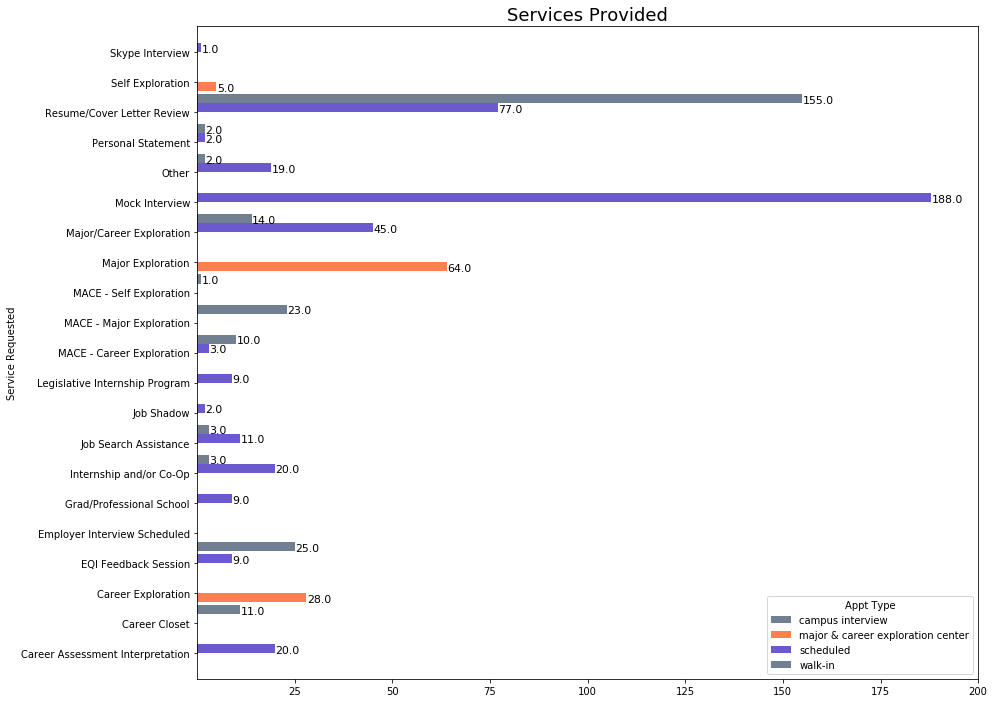

In [18]:
#SERVICE PROVIDED

data_appt['COUNTER'] = 0       #initially, set that counter to 0.
group_service = data_appt.groupby(['Service Requested', 'Appt Type'])['COUNTER'].size()
display(group_service.to)


group_service_barh = group_service.unstack().plot(kind='barh',figsize=(14,12), width=1.2,
                                                  color=['slategray', 'coral', "slateblue"])

group_service_barh.set_xticks([25,50,75,100,125,150,175,200])
group_service_barh.set_alpha(18)

#lABEL GRAPH
group_service_barh.set_title("Services Provided", fontsize=18)
    
#SET AXIS
# group_service_barh.set_xticks([0,2,4,6,8])

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in group_service_barh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list

total = sum(totals)

# set individual bar lables using above list
for i in group_service_barh.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_width()>0:
        group_service_barh.text(i.get_width()+.12, i.get_y()+.005, \
                str(i.get_width()), fontsize=11, color='black')

In [11]:
'''
Appointment type
1. Campus interview
2. Walk In
3. Scheduled
'''
class_level = cbss_['Class Level'].unique()
appt_type = cbss_['Appt Type'].unique()

appt_ = cbss_.groupby([ 'Major','Class Level', 'Appt Type']).size()

# for i in majors:
#     display(appt_[i].to_frame())

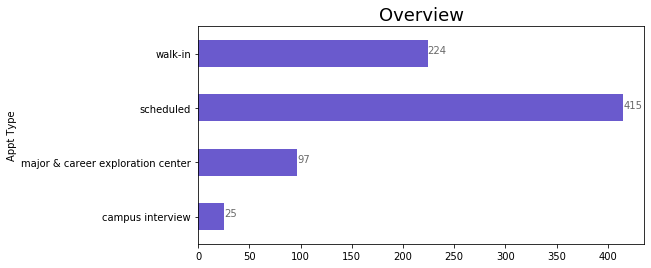

In [20]:
#APPOINTMENT TYPES

appt_type_count = data_appt.groupby('Appt Type').size()
appt_typeBarh = appt_type_count.plot.barh(x='appt_type_count', y='type',figsize=(8,4),color="slateblue")

#lABEL GRAPH
appt_typeBarh.set_title("Overview", fontsize=18)

#SET AXIS
# appt_typeBarh.set_xticks([0,2,4,6,8])

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in appt_typeBarh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in appt_typeBarh.patches:
    # get_width pulls left or right; get_y pushes up or down
    appt_typeBarh.text(i.get_width()+.1, i.get_y()+.25, \
            str(i.get_width()), fontsize=10, color='dimgrey')

# invert for largest on top 
# appt_ServiceBarh.invert_yaxis()


COUNTER
Major                          Appt Type                                 
Anthropology                   major & career exploration center        3
                               scheduled                                5
                               walk-in                                  3
Child/Fam Development          campus interview                         1
                               major & career exploration center       10
                               scheduled                               91
                               walk-in                                 17
Criminal Justice & Criminology campus interview                         2
                               major & career exploration center       13
                               scheduled                               69
                               walk-in                                 35
Cybercrime                     scheduled                                1
Fashion Merch & Apparel Design campus interview                         2
                               major & career exploration center        4
                               scheduled                                8
                               walk-in                                  5
Interior Design                major & career exploration center        4
                               scheduled                               10
                               walk-in                                  4
International Studies          campus interview                         2
                               major & career exploration center        9
                               scheduled                               13
                               walk-in                                 11
International Trade            campus interview                         5
                               major & career exploration center        2
                               scheduled                               15
                               walk-in                                  2
Law and Society                scheduled                                1
Political Science              campus interview                         4
                               major & career exploration center        1
                               scheduled                               29
                               walk-in                                  7
Psychology                     campus interview                         5
                               major & career exploration center       45
                               scheduled                              140
                               walk-in                                 97
Public Administration          campus interview                         1
                               scheduled                                2
Recreation                     campus interview                         1
                               major & career exploration center        3
                               scheduled                                5
                               walk-in                                 22
Social Science                 scheduled                                1
                               walk-in                                  4
Sociology                      campus interview                         2
                               major & career exploration center        3
                               scheduled                               25
                               walk-in                                 17

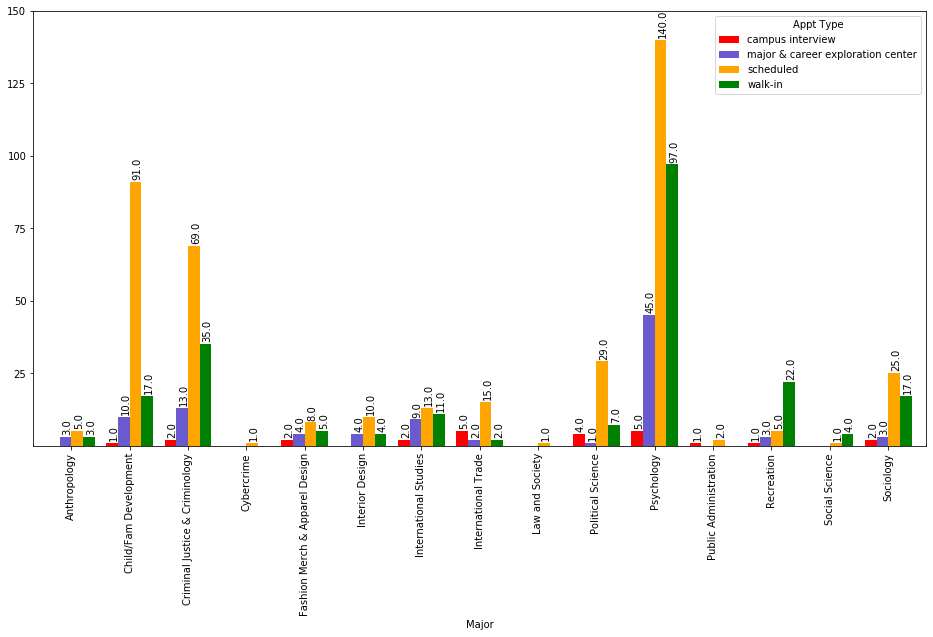

In [35]:
data_appt['COUNTER'] = 0       #initially, set that counter to 0.
appt_type = data_appt.groupby(['Major', 'Appt Type'])['COUNTER'].size()

display(appt_type.to_frame())
exit(0)
appt_type = appt_type.sort_values(ascending=False)
appt_type_barh = appt_type.unstack().plot(kind='bar', width=0.8, figsize=(16,8),
                                          color=['red', 'slateblue', "orange","green"],rot=90)
appt_type_barh.set_alpha(4.00)
appt_type_barh.set_yticks([25,50,75,100,125,150])
# appt_type_barh.set_xticklabels(['Child/Fam Development', 'Criminal Justice & Criminology' ,'Sociology'
#  'Psychology', 'Anthropology', 'Political Science',
#  'Fashion Merch & Apparel Design', 'Recreation' ,'International Studies'
#  'Interior Design', 'Law and Society' ,'Cybercrime'])

#lABEL GRAPH
# appt_type_barh.set_title("Services Provided", fontsize=18)

#ANNOTATE BARHS
totals = []

# find the values and append to list
for i in appt_type_barh.patches:
    totals.append(i.get_width())

# set individual bar lables using above list

total = sum(totals)

# set individual bar lables using above list
for i in appt_type_barh.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        appt_type_barh.text(i.get_x()+0.05, i.get_height()+1.5, \
                str(i.get_height()), fontsize=10, color='black',rotation=90)

In [14]:
'''
RESUME REVIEWS
'''
# , 'Approval', 'GPA'
group_ = cbss_ .groupby(['Major','Class Level']).size()
group_ =group_.sort_values(ascending=False)

In [17]:
data_event = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\CBSS Reports\cbss_event.csv', 
                          header=1,  encoding = "ISO-8859-1")
data_attendance = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\CBSS Reports\cbss_eventAttendance.csv', 
                          header=1,  encoding = "ISO-8859-1")

cbss_event = data_event.loc[data_event['College'] == 'Behavioral and Social Sciences']
# cbss_attendance = data_attendance.loc[data_event['College'] == 'Behavioral and Social Sciences']
# event_ = cbss_event.groupby(['Event Name', 'Major']).size()
# events = cbss_event['Event Name'].unique()

Text(0.5, 0.98, 'CBSS Students Resume Comparison')

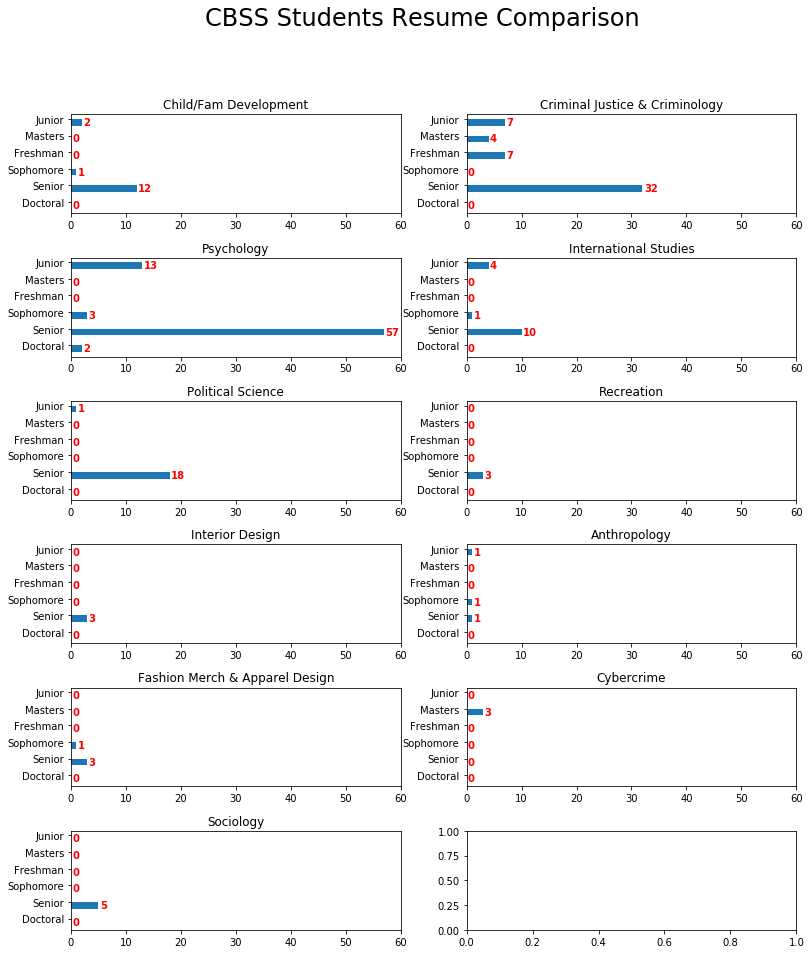

In [18]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
cols = 2

if len(majors) % cols == 0:
    rows = len(majors) / cols
else:
    rows = (len(majors) / cols) + 1

fig, axes = plt.subplots(nrows=int(rows), ncols=cols, figsize=(13, 15))

my_proper_dict = {}

my_levels = list(set(cbss_['Class Level']))

for major_ in majors:
    school_dict = dict(group_[major_])
    count_lst = []
    for level in my_levels:
        if level in school_dict.keys():
            count_lst.append(school_dict[level])
        else:
            count_lst.append(0)
    
    my_proper_dict[major_] = count_lst

idx = [i for i, key in enumerate(my_levels, 1)]

for i, axis in enumerate(axes, 0):
    for j, ax in enumerate(axis, 0):
        if cols*i + j < len(majors):
            major_ = majors[cols*i + j]
            width = 0.4
            ax.set_title(major_)
            ax.set_yticks([i+width/2 for i in idx])
            ax.set_yticklabels(my_levels)
            ax.set_xlim([0, 60])
            ax.barh(idx, my_proper_dict[major_], width)
            for k, v in enumerate(my_proper_dict[major_]):
                ax.text(v + 0.25, k + 0.83, str(v), color='red', fontweight='bold')
fig.subplots_adjust(hspace=0.45, wspace=0.2)
fig.suptitle('CBSS Students Resume Comparison', fontsize=24)


In [7]:
cbss_attendance = data_attendance.loc[data_attendance['College'] == 'Behavioral and Social Sciences']

cbss_attendance.replace('International Trade', 'International Studies', inplace=True)
cbss_attendance.replace('Graduate Masters', 'Masters', inplace=True)
cbss_attendance.replace('Graduate Masters', 'Masters', inplace=True)

# cbss_attendance = cbss_attendance.loc[cbss_attendance['Major'] == 'Public Administration'].dropna(inplace=True)
delete_row = cbss_attendance[cbss_attendance["Major"]=='Public Administration'].index
cbss_attendance = cbss_attendance.drop(delete_row)

# cbss_attendance['Events Attended'].lower()

cbss_attendance = cbss_attendance.apply(lambda x: x.astype(str).str.lower())
# cbss_attendance

NameError: name 'data_attendance' is not defined

In [132]:
val = cbss_attendance[cbss_attendance['Event Attended'].str.contains('interviewing')]

vals = val.groupby(['Event Attended','Major', 'Class Level']).size()
# vals = vals.sort_values(ascending=False)
display(vals.to_frame())

In [104]:
resume_crit = cbss_attendance[cbss_attendance['Event Attended'].str.contains('critique')]


resume_crit['Event Attended'] = resume_crit['Event Attended'].str[:27]
# display(resume)
res = resume_crit.groupby(['Event Attended','Major']).size()
# vals = vals.sort_values(ascending=False)
# display(res.to_frame())

resume_other=cbss_attendance[cbss_attendance['Event Attended'].str.contains('resume')]
res_other = resume_other.groupby(['Event Attended','Major']).size()
# display(res_other.to_frame())

C:\Users\sushmita-khan\AppData\Local\Continuum\anaconda3\envs\career deve reports\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [151]:
pres = cbss_attendance[cbss_attendance['Event Attended'].str.contains('dr')]


# pres['Event Attended'] = resume_crit['Event Attended'].str[:27]
# display(resume)
pres_ = pres.groupby(['Event Attended','Major']).size()
display(pres_.to_frame())

0
Event Attended                                     Major                             
classroom presentation-dr. dwight sneathen-        criminal justice & criminology   1
                                                   international studies            1
                                                   psychology                       1
classroom presentation-dr. lindsay larson          fashion merch & apparel design   1
                                                   political science                2
                                                   psychology                       1
classroom presentation-dr. mark hanna - fye        psychology                       2
classroom presentation-dr. mark hanna-fye          fashion merch & apparel design   1
                                                   recreation                       1
classroom presentation-logistics-dr. marc scott    political science                1
dr. muller eng 1102                                fashion merch & apparel design   2
                                                   psychology                       1
                                                   recreation                       1
dr. peden interviewing                             recreation                      18
dr. walsh                                          social science                   2
                                                   sociology                       18
fye presentation - dr. brian feltman               interior design                  1
                                                   international studies            1
                                                   psychology                       1
pdds1 - landing your dream job with linkedin       criminal justice & criminology   1
                                                   recreation                       1
pdds4 - \tdo i have to dress up? professional i... child/fam development            1
psyc - dr. wolfe                                   psychology                      16

In [970]:
cbss_attendance['Major'].unique()

array(['Psychology', 'Recreation', 'Criminal Justice & Criminology',
       'Social Science', 'International Studies', 'Political Science',
       'Child/Fam Development', 'Anthropology',
       'Fashion Merch & Apparel Design', 'Interior Design', 'Sociology',
       'Law and Society', 'Cybercrime'], dtype=object)

In [971]:
colors =  ["#E13F29", "#D69A80", "#D63B59", "#CB5C3B", "#EB8076", "#AE5552",
           "#96624E",'#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#c2c2f0','#ffb3e6']

p = cbss_attendance['Event Attended'].unique()
# present = cbss_attendance.groupby(['Event Attended', 'Major']).size()
present_count = cbss_attendance.groupby(['Event Attended', 'Major']).size()

# display(p)

0
Event Attended                      Major                          Class Level   
Armstrong Campus Spring Career Fair Criminal Justice & Criminology Junior       3
                                                                   Senior       1
                                    Political Science              Senior       1
                                    Psychology                     Freshman     1
                                                                   Senior       3

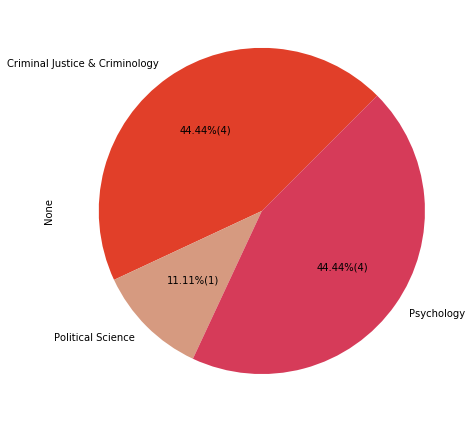

In [949]:
arm_car__sp19 = present_count['Armstrong Campus Spring Career Fair'].plot(kind='pie', figsize = [7.5,7.5], colors=colors,
                                                                          startangle=45,
autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*present_count
                                           ['Armstrong Campus Spring Career Fair'].sum()))

arm_car__sp19_table = p_[['Armstrong Campus Spring Career Fair']]
out = (arm_car__sp19_table.to_frame())
# OUT_ = HTML(out.to_html(header=True, index=False,col_space= 10, show_dimensions=True))

out


0
Event Attended                                     Major                          Class Level    
Criminal Justice Internship & Career Fair Sp19-... Criminal Justice & Criminology Junior        5
                                                                                  Masters       2
                                                                                  Senior       11
                                                                                  Sophomore     2
                                                   Law and Society                Senior        3
                                                   Psychology                     Freshman      1
                                                   Sociology                      Senior        1

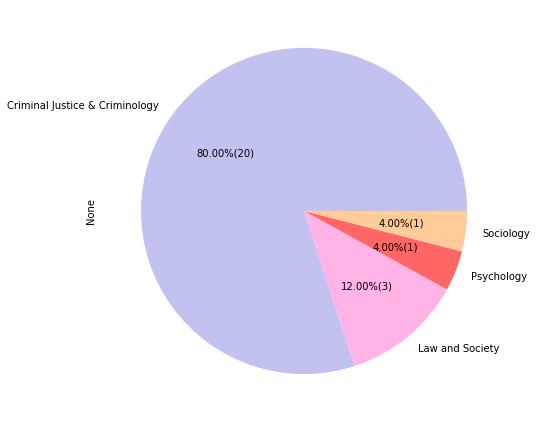

In [950]:
color_3 = ['#c2c2f0','#ffb3e6', '#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
arm_Justice_sp19 = present_count['Criminal Justice Internship & Career Fair Sp19- Armstrong Campus'].plot(kind='pie', figsize = [7.5,7.5],
colors=color_3,autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*present_count
                                           ['Criminal Justice Internship & Career Fair Sp19- Armstrong Campus'].sum()))

arm_Justice_sp19__sp19_table = p_[['Criminal Justice Internship & Career Fair Sp19- Armstrong Campus']]
out_sp19 = (arm_Justice_sp19__sp19_table.to_frame())
# OUT_ = HTML(out.to_html(header=True, index=False,col_space= 10, show_dimensions=True))

out_sp19

0
Event Attended                                     Major                          Class Level    
Criminal Justice & Internship Career Fair - Fal... Criminal Justice & Criminology Freshman      3
                                                                                  Junior       17
                                                                                  Masters       7
                                                                                  Senior       53
                                                                                  Sophomore     5
                                                   Cybercrime                     Masters       1
                                                   Political Science              Senior        4
                                                   Psychology                     Freshman      2
                                                                                  Junior        4
                                                                                  Senior        7
                                                                                  Sophomore     2
                                                   Sociology                      Senior        2

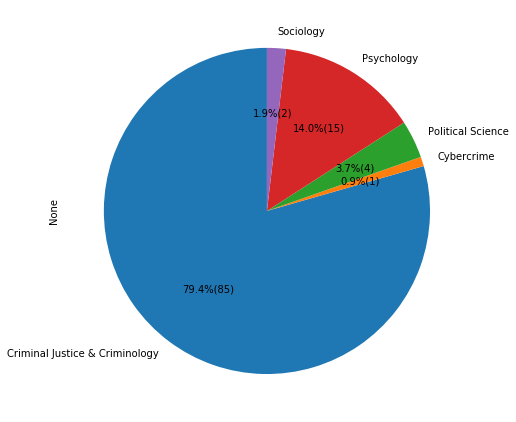

In [951]:
boro_Justice_F19 = present_count['Criminal Justice & Internship Career Fair - Fall 2018'].plot(kind='pie', figsize = [7.5,7.5],
                                                                                               startangle=90,
autopct=lambda p: '{:.1f}%({:.0f})'.format(p, (p/100)*present_count
                                           ['Criminal Justice & Internship Career Fair - Fall 2018'].sum()))

boro_Justice_F18_table = p_[['Criminal Justice & Internship Career Fair - Fall 2018']]
out_f18 = (boro_Justice_F19_table.to_frame())
# OUT_ = HTML(out.to_html(header=True, index=False,col_space= 10, show_dimensions=True))

out_f18

0
Event Attended                                     Major                          Class Level   
Graduate School Fair, Fall 2018 - Armstrong Campus Criminal Justice & Criminology Senior       1
                                                   Psychology                     Junior       1
                                                   Sociology                      Senior       1

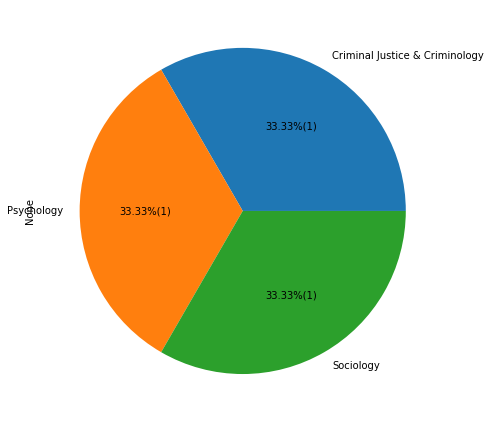

In [952]:
grad_fair_Arm2018 = present_count['Graduate School Fair, Fall 2018 - Armstrong Campus'].plot(kind='pie', figsize = [7.5,7.5],
autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*present_count
                                           ['Graduate School Fair, Fall 2018 - Armstrong Campus'].sum()))

grad_fair_Arm2018_table = p_[['Graduate School Fair, Fall 2018 - Armstrong Campus']]
out_grad18 = (grad_fair_Arm2018_table.to_frame())
out_grad18

0
Event Attended                                     Major                          Class Level    
Graduate School Fair, Fall 2018 - Statesboro Ca... Anthropology                   Senior        2
                                                   Child/Fam Development          Senior        1
                                                   Criminal Justice & Criminology Junior        1
                                                                                  Masters       1
                                                                                  Senior        3
                                                   Political Science              Senior        4
                                                                                  Sophomore     1
                                                   Psychology                     Masters       1
                                                                                  Senior       13
                                                   Sociology                      Senior        2

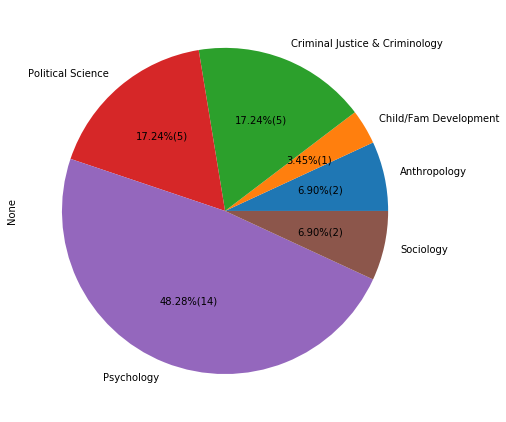

In [956]:
grad_fair_boro2018 = present_count['Graduate School Fair, Fall 2018 - Statesboro Campus'].plot(kind='pie', figsize = [7.5,7.5],
autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*present_count
                                           ['Graduate School Fair, Fall 2018 - Statesboro Campus'].sum()))

grad_fair_boro2018 = p_[['Graduate School Fair, Fall 2018 - Statesboro Campus']]
out_grad = (grad_fair_boro2018.to_frame())
out_grad

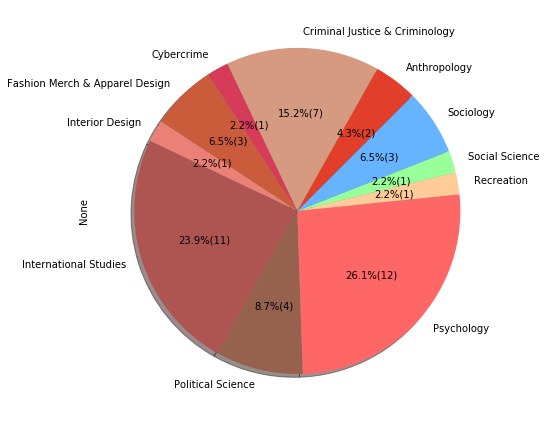

In [929]:
# sizes_gender = [315,189,125,212,270,145,190,90]
colors_2 = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
color_3 = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
colors =  ["#E13F29", "#D69A80", "#D63B59", "#CB5C3B", "#EB8076", "#AE5552",
           "#96624E",'#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#c2c2f0','#ffb3e6']

expo_F2018 = present_count['Eagle Expo Career Fair - Fall 2018'].plot(kind='pie', figsize = [7.5,7.5],
autopct=lambda p: '{:.1f}%({:.0f})'.format(p, (p/100)*present_count
                                           ['Eagle Expo Career Fair - Fall 2018'].sum()), startangle=45, shadow=True,
                                                                     legend = False, fontsize=10, colors=colors)

p_ = cbss_attendance.groupby(['Event Attended','Major','Class Level']).size()

In [930]:
expo_F18_table = p_[['Eagle Expo Career Fair - Fall 2018']]
out = (expo_F18_table.to_frame())
OUT_ = HTML(out.to_html(header=True, index=False,col_space= 10, show_dimensions=True))

out

0
Event Attended                     Major                          Class Level    
Eagle Expo Career Fair - Fall 2018 Anthropology                   Senior        2
                                   Criminal Justice & Criminology Senior        7
                                   Cybercrime                     Masters       1
                                   Fashion Merch & Apparel Design Junior        1
                                                                  Senior        2
                                   Interior Design                Freshman      1
                                   International Studies          Junior        1
                                                                  Senior       10
                                   Political Science              Senior        3
                                                                  Sophomore     1
                                   Psychology                     Junior        2
                                                                  Senior        9
                                                                  Sophomore     1
                                   Recreation                     Freshman      1
                                   Social Science                 Masters       1
                                   Sociology                      Senior        2
                                                                  Sophomore     1

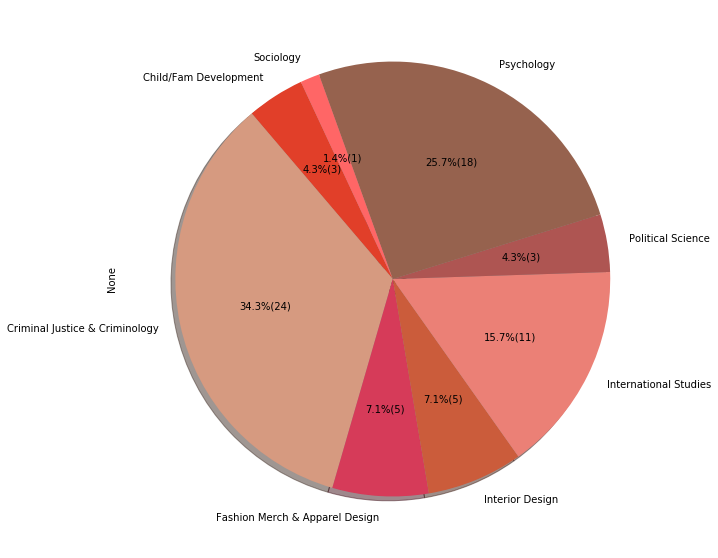

In [965]:
expo_S2019 = present_count['Eagle Expo Career Fair - Spring 2019'].plot(kind='pie', figsize = [10,10],
autopct=lambda p: '{:.1f}%({:.0f})'.format(p, (p/100)*present_count
                                           ['Eagle Expo Career Fair - Spring 2019'].sum()), startangle=115, shadow=True,
                                                                     legend = False, fontsize=10, colors=colors)

# expo_S2019_table = p_[['Eagle Expo Career Fair - Spring 2019']]
# out2 = (expo_S2019_table.to_frame())
# OUT2_ = HTML(out.to_html(header=True, index=False,col_space= 10, show_dimensions=True))

# out2

In [972]:
people = display(present[['Dr. Peden interviewing','Chad Posick', 'Barb King',
               'Eric Silva - MASS', 'Lynell Williams', 'Dina Walker-Devose', 'Barb King Interviewing',
       'Ryan Colliou 10:10', 'Sarah Zenti', 'Tahseen Kazi'
]].to_frame())

0
Event Attended         Major                             
Barb King              Criminal Justice & Criminology  17
                       Psychology                       1
Barb King Interviewing Criminal Justice & Criminology  32
                       Psychology                       1
Chad Posick            Criminal Justice & Criminology  23
                       Cybercrime                       1
                       Political Science                1
                       Social Science                   1
Dina Walker-Devose     Child/Fam Development           33
Dr. Peden interviewing Recreation                      18
Eric Silva - MASS      Social Science                   7
Lynell Williams        International Studies            1
                       Psychology                       2
                       Recreation                       1
Ryan Colliou 10:10     Psychology                      16
                       Recreation                       1
Sarah Zenti            Interior Design                 22
Tahseen Kazi           International Studies            5
                       Political Science                1

In [1]:
# presentations = display(present[['Classroom Presentation-Dr. Dwight Sneathen-','Class Presentation-S. Roach-FYE-12:20',
#                                 'Classroom Presentation-Dr. Mark Hanna - FYE','Class Presentation-SHRM',
#                                 'Classroom Presentation-Dr. Lindsay Larson','Classroom Presentation-BUSA 1105-Buckhoff',
#                                  'Class Presentation-GSLA','Classroom Presentation-Dr. Mark Hanna-FYE'
#                                  ,'Classroom Presentation - Harter - 10:10','Classroom Presentation-SHRM',
#                                  'Classroom Presentation-Logistics-Dr. Marc Scott','Classroom Presentation-D. Sneathen-',
#                                  'Classroom Presentation-National Retail Federation Student Association',
#                                  'Class Presentation-M. Hasbrouck-10:10'
# ]]
#                         .to_frame())

In [749]:
# psych = display(present[['PSYC 2101', 'PSYC 4132 Presentation','PSYC 4290',
#        'PSYC 4790', 'PSYC Internship Course','PSYC 4130','PSYC - Dr. Wolfe',
#        'PSYC Internship Presentation'

# ]].to_frame())

0
Event Attended               Major                             
PSYC - Dr. Wolfe             Psychology                      16
PSYC 2101                    Child/Fam Development            1
                             Criminal Justice & Criminology   1
                             Psychology                      64
PSYC 4130                    Psychology                       1
PSYC 4132 Presentation       Psychology                      12
PSYC 4290                    Psychology                       6
PSYC 4790                    Psychology                      11
PSYC Internship Course       Psychology                      21
PSYC Internship Presentation Psychology                      18

In [954]:
grad = display(present[['Information Session-Personal Statement',
                        'Education Career Fair - Spring 2019']].to_frame())

0
Event Attended                         Major                            
Education Career Fair - Spring 2019    Fashion Merch & Apparel Design  1
                                       Interior Design                 1
                                       Political Science               1
                                       Psychology                      1
                                       Public Administration           1
Information Session-Personal Statement Interior Design                 1
                                       Psychology                      1

In [46]:
email_ser = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\CBSS Reports\cbss_email.csv', header=1,  encoding = "ISO-8859-1")
email_ser = email_ser.loc[email_ser['School Of'] == 'Behavioral and Social Sciences']

display(email_ser['Note Method'].unique())
display(email_ser['Major'].unique())

delete_row = email_ser[email_ser["Major"]=='Public Administration'].index
email_ser.replace('International Studies', 'International Trade', inplace=True)

email_ser.replace('Grad/Professional School', 'Graduate School Assistant', inplace=True)
email_ser.replace('Grad/Professional School,Resume/Cover Letter Review', 'Graduate School Assistant', inplace=True)

email_ser.replace('Internship and/or Co-Op,Major/Career Exploration,Other', 
                  'Internship and/or Co-Op,Major/Career Exploration,Other', inplace=True)
email_ser.replace('Internship and/or Co-Op,Other', 
                  'Internship and/or Co-Op,Major/Career Exploration,Other', inplace=True)
email_ser.replace('Internship and/or Co-Op', 
                  'Internship and/or Co-Op,Major/Career Exploration,Other', inplace=True)
email_ser.replace('Internship and/or Co-Op,Other,Resume/Cover Letter Review', 
                  'Internship and/or Co-Op,Major/Career Exploration,Other', inplace=True)

email_ser.replace('Major/Career Exploration', 'Internship and/or Co-Op,Major/Career Exploration,Other', inplace=True)
email_ser.replace('Other,Resume/Cover Letter Review', 'Resume/Cover Letter Review', inplace=True)
email_ser.replace('Job Search Assistance,Resume/Cover Letter Review', 'Job Search Assistance', inplace=True)


email_ser = email_ser.loc[email_ser['Note Method'] == 'Phone']

array(['Email', 'Appointment', 'Miscellaneous', nan, 'Walk In', 'Phone',
       'Virtual Interview'], dtype=object)

array(['Sociology', 'Criminal Justice & Criminology', 'Psychology',
       'Fashion Merch & Apparel Design', 'Recreation', 'Social Science',
       'Child/Fam Development', 'Political Science',
       'International Studies', 'International Trade', 'Cybercrime',
       'Interior Design', 'Anthropology', 'Public Administration',
       'Law and Society'], dtype=object)

In [47]:
serv = email_ser.groupby(['Note Type']).size()

serv.to_frame()

,0
Note Type,
EQI Feedback Session,5
Graduate School Assistant,1
Job Search Assistance,3
Resume/Cover Letter Review,1
